In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df=pd.read_csv('/content/bandgap.csv')
df.dropna()

,Radius(Ra),Radius(Rb),Electronegativity(A),Electronegativity(B),Ionization Energy(A),Ionization Energy(B),Ra/Rb,Molecular Weight,Electron Affinity(A),Electron Affinity(B),A_Tm,B_Tm,Boiling point(A),Boiling point(B),Density(A),Density(B),Band gap(eV)
0,103.2,55.00,1.10,1.83,5.577,7.902,1.876,242.75,48.00,15.70,918.0,1538.0,3464.0,2861.00,6.15,7.87,2.10
1,103.2,55.00,1.10,1.83,5.577,7.902,1.876,242.75,48.00,15.70,918.0,1538.0,3464.0,2861.00,6.15,7.87,2.10
2,103.2,55.00,1.10,1.83,5.577,7.902,1.876,242.75,48.00,15.70,918.0,1538.0,3464.0,2861.00,6.15,7.87,2.10
3,103.2,55.00,1.10,1.83,5.577,7.902,1.876,242.75,48.00,15.70,918.0,1538.0,3464.0,2861.00,6.15,7.87,2.10
4,119.0,66.88,2.33,1.84,7.416,7.835,1.779,384.53,35.10,34.46,327.5,2237.9,1749.0,4016.22,11.34,11.75,2.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,77.0,64.00,1.90,1.60,7.720,6.758,1.203,204.45,119.23,86.10,1085.0,2477.0,2562.0,4927.00,8.83,8.57,2.00
82,57.0,73.00,1.90,1.66,7.720,6.766,0.780,147.54,119.23,64.30,1085.0,1907.0,2562.0,2672.00,8.83,7.20,3.15
83,60.0,66.50,1.90,2.28,7.720,7.458,0.902,198.45,119.23,110.27,1085.0,1963.0,2562.0,3697.00,8.83,12.41,1.90
84,57.0,67.00,1.90,1.55,7.720,7.434,0.850,150.48,119.23,50.00,1085.0,1246.0,2562.0,2061.00,8.83,3.70,1.31


In [ ]:
df.shape

(86, 17)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Co relation matrix**

Correlation matrix is : 
                      Radius(Ra)  Radius(Rb)  Electronegativity(A)  \
Radius(Ra)              1.000000    0.218678             -0.307397   
Radius(Rb)              0.218678    1.000000             -0.091084   
Electronegativity(A)   -0.307397   -0.091084              1.000000   
Electronegativity(B)   -0.052347   -0.065285              0.226525   
Ionization Energy(A)   -0.524922    0.008550              0.700821   
Ionization Energy(B)    0.199014   -0.078524             -0.028888   
Ra/Rb                   0.728358   -0.450247             -0.164830   
Molecular Weight       -0.088170   -0.109702              0.258154   
Electron Affinity(A)   -0.484780   -0.016612              0.536080   
Electron Affinity(B)    0.030310   -0.030759              0.096470   
A_Tm                   -0.651683   -0.116103             -0.171283   
B_Tm                    0.191932   -0.164210             -0.046649   
Boiling point(A)       -0.368694   -0.204850             -0.17820

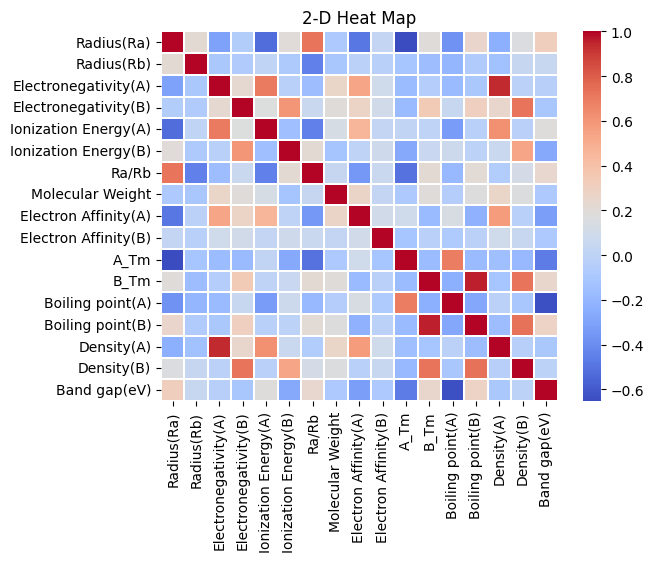

In [ ]:
matrix = df.corr()
print("Correlation matrix is : ")
print(matrix)
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap( matrix , linewidth = 0.1 , cmap = 'coolwarm' )

plt.title( "2-D Heat Map" )
plt.show()

In [ ]:
pip install mrmr_selection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.1 MB/s eta 0:00:00


**Features Selection**

Selected Features:
Index(['Ionization Energy(A)', 'Electronegativity(A)', 'Electron Affinity(A)',
       'Boiling point(A)', 'A_Tm', 'Density(A)'],
      dtype='object')


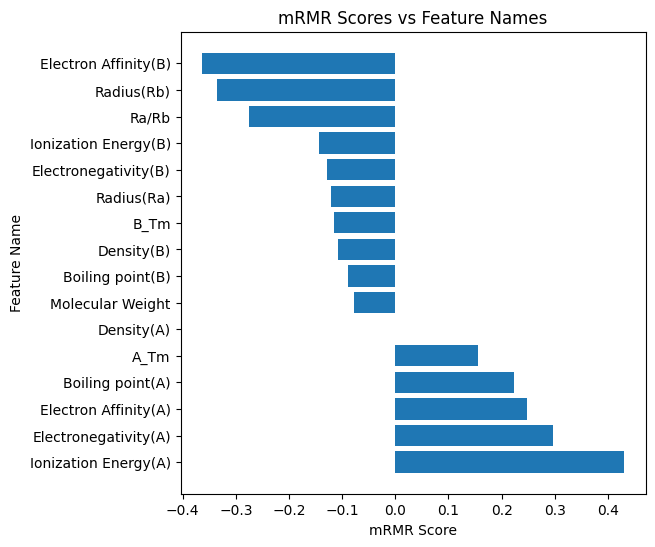

In [ ]:
import mrmr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression

def mrmr_feature_selection(X, y, k):
    # Compute mutual information between features and target variable
    mi = mutual_info_regression(X, y)
    mi /= np.max(mi)  # Normalize mutual information scores

    # Calculate mRMR scores
    mrmr_scores = []
    n_features = X.shape[1]
    for i in range(n_features):
        mrmr_scores.append(mi[i] - (1 / k) * np.sum([mi[j] for j in range(k)]))

    # Select top-k features with highest mRMR scores
    top_features_indices = np.argsort(mrmr_scores)[::-1][:k]
    top_features = X.columns[top_features_indices]

    return top_features, mrmr_scores

# # Load your dataset (replace with your own dataset)
# data = pd.read_csv('/content/bandgap.csv')

# Split the data into X (features) and y (target variable)
X = df.drop('Band gap(eV)', axis=1)
y = df['Band gap(eV)']

# Set the number of features you want to select
k = 6

# Perform mRMR feature selection
selected_features, mrmr_scores = mrmr_feature_selection(X, y, k)
print("Selected Features:")
print(selected_features)

# Sort the mRMR scores and feature names in decreasing order
sorted_indices = np.argsort(mrmr_scores)[::-1]
sorted_features = X.columns[sorted_indices]
sorted_scores = np.array(mrmr_scores)[sorted_indices]

# Plot mRMR scores vs feature names
plt.figure(figsize=(6, 6))
plt.barh(sorted_features, sorted_scores)
plt.xlabel('mRMR Score')
plt.ylabel('Feature Name')
plt.title('mRMR Scores vs Feature Names')
plt.show()

# Split the data into training and testing sets
X_selected = X[selected_features]

In [ ]:
df.columns

Index(['Radius(Ra)', 'Radius(Rb)', 'Electronegativity(A)',
       'Electronegativity(B)', 'Ionization Energy(A)', 'Ionization Energy(B)',
       'Ra/Rb', 'Molecular Weight', 'Electron Affinity(A)',
       'Electron Affinity(B)', 'A_Tm', 'B_Tm', 'Boiling point(A)',
       'Boiling point(B)', 'Density(A)', 'Density(B)', 'Band gap(eV)'],
      dtype='object')

In [ ]:
df2 = df.drop(columns=['Radius(Ra)', 'Radius(Rb)', 'Electronegativity(B)', 'Ionization Energy(B)','Ra/Rb', 'Molecular Weight', 'Electron Affinity(B)',  'B_Tm','Boiling point(B)', 'Density(B)'])

In [ ]:
df2

,Electronegativity(A),Ionization Energy(A),Electron Affinity(A),A_Tm,Boiling point(A),Density(A),Band gap(eV)
0,1.10,5.577,48.00,918.0,3464.0,6.15,2.10
1,1.10,5.577,48.00,918.0,3464.0,6.15,2.10
2,1.10,5.577,48.00,918.0,3464.0,6.15,2.10
3,1.10,5.577,48.00,918.0,3464.0,6.15,2.10
4,2.33,7.416,35.10,327.5,1749.0,11.34,2.66
...,...,...,...,...,...,...,...
81,1.90,7.720,119.23,1085.0,2562.0,8.83,2.00
82,1.90,7.720,119.23,1085.0,2562.0,8.83,3.15
83,1.90,7.720,119.23,1085.0,2562.0,8.83,1.90
84,1.90,7.720,119.23,1085.0,2562.0,8.83,1.31


In [ ]:
X = df2.iloc[:,:-1]
y = df2.iloc[:,-1]
X


,Electronegativity(A),Ionization Energy(A),Electron Affinity(A),A_Tm,Boiling point(A),Density(A)
0,1.10,5.577,48.00,918.0,3464.0,6.15
1,1.10,5.577,48.00,918.0,3464.0,6.15
2,1.10,5.577,48.00,918.0,3464.0,6.15
3,1.10,5.577,48.00,918.0,3464.0,6.15
4,2.33,7.416,35.10,327.5,1749.0,11.34
...,...,...,...,...,...,...
81,1.90,7.720,119.23,1085.0,2562.0,8.83
82,1.90,7.720,119.23,1085.0,2562.0,8.83
83,1.90,7.720,119.23,1085.0,2562.0,8.83
84,1.90,7.720,119.23,1085.0,2562.0,8.83


In [ ]:
y

0     2.10
1     2.10
2     2.10
3     2.10
4     2.66
      ... 
81    2.00
82    3.15
83    1.90
84    1.31
85    1.70
Name: Band gap(eV), Length: 86, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)


In [ ]:
!pip install interpret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 28.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 86.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 91.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 95.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.

**Random Forest regression**

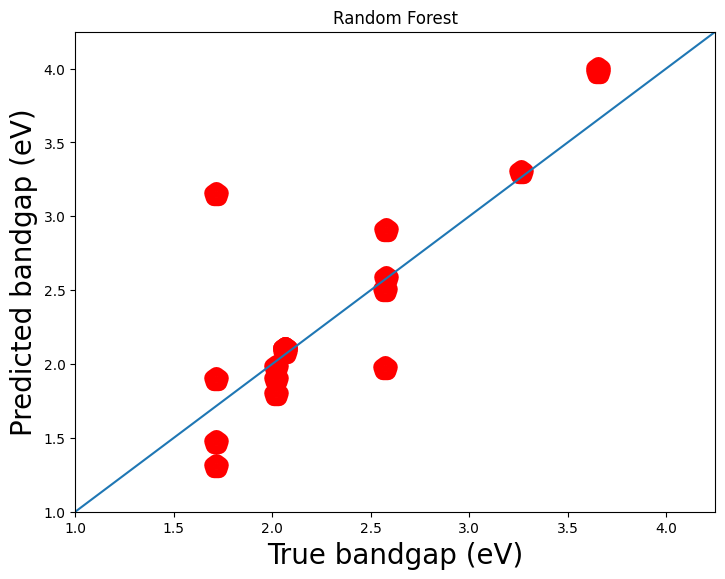

0.4148632265657748
[[1.         0.84215097]
 [0.84215097 1.        ]]
r2= 0.7014782854411987


array([3.26456024, 2.5785054 , 1.71230172, 2.5785054 , 2.57441836,
       2.57441836, 3.65503167, 2.06253861, 3.65503167, 2.01962324,
       2.01962324, 1.71230172, 2.06253861, 2.06253861, 1.71230172,
       2.06253861, 1.71230172, 2.01962324])

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 20)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(y_pred, y_test,color='r',linewidths=12,marker="p",)
ax.plot([0,1],[0,1], transform=ax.transAxes)
# ax.set_xlabel('True bandgap')
# ax.set_ylabel('Predicted bandgap')
ax.set_title('Random Forest')
plt.rc('font', size=20)
plt.ylim([100,50])
plt.rcParams["figure.figsize"] = (5,5)
plt.xlabel('True bandgap (eV)', fontsize=20)
plt.ylabel('Predicted bandgap (eV)', fontsize=20)
plt.xlim([1,4.25])
plt.ylim([1,4.25])
plt.show()

from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_test, y_pred, squared=False)
print(rms)
r=np.corrcoef(y_test, y_pred)
print(r)
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('r2=',r2)

y_pred

**Shapley**

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install interpret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# fit a GAM model to the data
import interpret.glassbox
model_ebm = interpret.glassbox.ExplainableBoostingRegressor(interactions=0)
model_ebm.fit(X_train, y_train)

ExplainableBoostingRegressor(interactions=0)

Exact explainer: 87it [00:17,  4.71it/s]                        


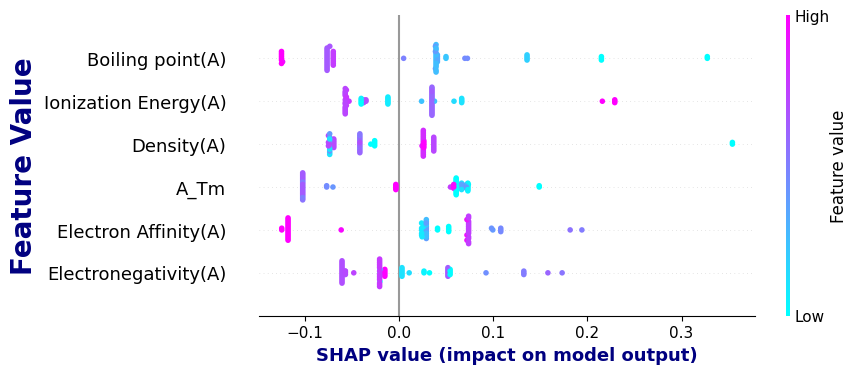

In [ ]:
import shap as shap
from sklearn.ensemble import RandomForestRegressor

X40 = shap.utils.sample(X_train, 40)
explainer = shap.Explainer(regressor.predict, X40)
shap_values = explainer(X_selected)

# explain the GAM model with SHAP
explainer_ebm = shap.Explainer(model_ebm.predict, X40)
shap_values_ebm = explainer_ebm(X_train)

import matplotlib.pyplot as plt
font1={'family':'Times New Roman','color':'navy','fontweight':'bold','size':20}
font2={'family':'Times New Roman','color':'navy','fontweight':'bold','size':20}
plt.xlabel('SHAP Value',fontdict=font1)
plt.ylabel('Feature Value',fontdict=font2)
import matplotlib.pyplot as plt
shap.plots.beeswarm(shap_values_ebm,axis_color='#000000',alpha=1,order=shap_values.abs.max(0),color=plt.get_cmap("cool"))

**XGBR**

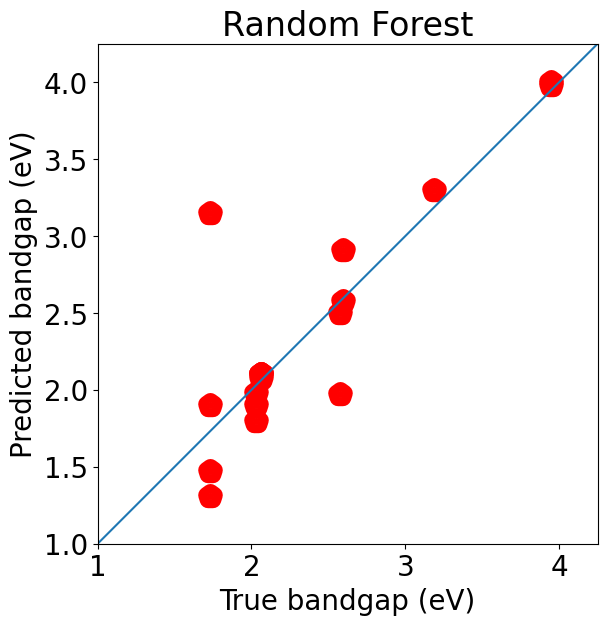

0.398125626937135
[[1.         0.85304647]
 [0.85304647 1.        ]]
r2= 0.7250800140523728


array([3.187035 , 2.5918467, 1.7286023, 2.5918467, 2.5731127, 2.5731127,
       3.9489155, 2.0599172, 3.9489155, 2.026176 , 2.026176 , 1.7286023,
       2.0599172, 2.0599172, 1.7286023, 2.0599172, 1.7286023, 2.026176 ],
      dtype=float32)

In [ ]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train,y_train)
y_pred = model_xgb.predict(X_test)
Pred_XGB = np.array(model_xgb.predict(X_test))

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(y_pred, y_test,color='r',linewidths=12,marker="p",)
ax.plot([0,1],[0,1], transform=ax.transAxes)
# ax.set_xlabel('True bandgap')
# ax.set_ylabel('Predicted bandgap')
ax.set_title('Random Forest')
plt.rc('font', size=20)
plt.ylim([100,50])
plt.rcParams["figure.figsize"] = (5,5)
plt.xlabel('True bandgap (eV)', fontsize=20)
plt.ylabel('Predicted bandgap (eV)', fontsize=20)
plt.xlim([1,4.25])
plt.ylim([1,4.25])
plt.show()

from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_test, y_pred, squared=False)
print(rms)
r=np.corrcoef(y_test, y_pred)
print(r)
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('r2=',r2)

y_pred


**Support vector regression**

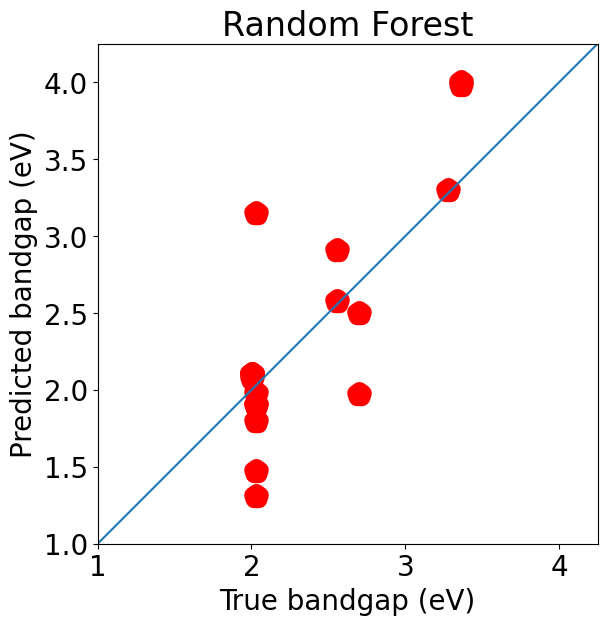

0.4533248735244777
[[1.        0.8198693]
 [0.8198693 1.       ]]
r2= 0.6435610595573216


array([3.27494613, 2.55406982, 2.03135052, 2.55406982, 2.69974168,
       2.69974168, 3.36362794, 2.00017242, 3.36362794, 2.03134982,
       2.03134982, 2.03135052, 2.00017242, 2.00017242, 2.03135052,
       2.00017242, 2.03135052, 2.03134982])

In [ ]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(y_pred, y_test,color='r',linewidths=12,marker="p",)
ax.plot([0,1],[0,1], transform=ax.transAxes)
# ax.set_xlabel('True bandgap')
# ax.set_ylabel('Predicted bandgap')
ax.set_title('Random Forest')
plt.rc('font', size=20)
plt.ylim([100,50])
plt.rcParams["figure.figsize"] = (5,5)
plt.xlabel('True bandgap (eV)', fontsize=20)
plt.ylabel('Predicted bandgap (eV)', fontsize=20)
plt.xlim([1,4.25])
plt.ylim([1,4.25])
plt.show()

from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_test, y_pred, squared=False)
print(rms)
r=np.corrcoef(y_test, y_pred)
print(r)
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('r2=',r2)

y_pred

**KNN**

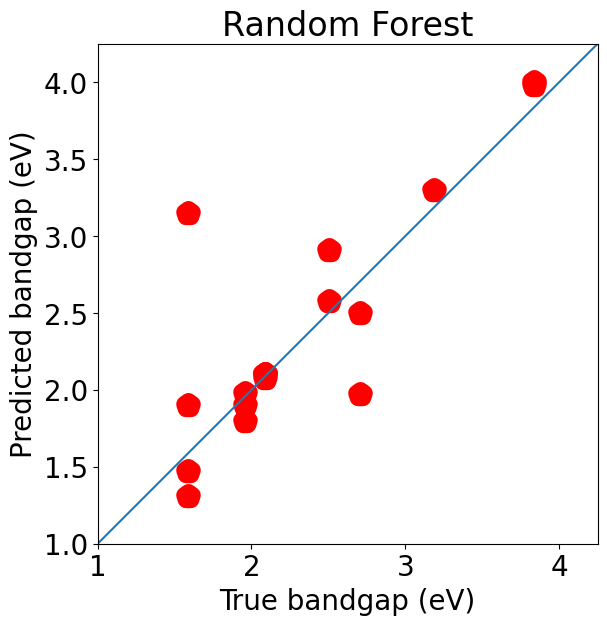

0.4385575401807415
[[1.         0.82514158]
 [0.82514158 1.        ]]
r2= 0.6664052475121909


array([3.18666667, 2.50666667, 1.59      , 2.50666667, 2.70333333,
       2.70333333, 3.83333333, 2.08666667, 3.83333333, 1.96      ,
       1.96      , 1.59      , 2.08666667, 2.08666667, 1.59      ,
       2.08666667, 1.59      , 1.96      ])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train,  y_train)
y_pred = knn.predict(X_test)

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(y_pred, y_test,color='r',linewidths=12,marker="p",)
ax.plot([0,1],[0,1], transform=ax.transAxes)
# ax.set_xlabel('True bandgap')
# ax.set_ylabel('Predicted bandgap')
ax.set_title('Random Forest')
plt.rc('font', size=20)
plt.ylim([100,50])
plt.rcParams["figure.figsize"] = (5,5)
plt.xlabel('True bandgap (eV)', fontsize=20)
plt.ylabel('Predicted bandgap (eV)', fontsize=20)
plt.xlim([1,4.25])
plt.ylim([1,4.25])
plt.show()

from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_test, y_pred, squared=False)
print(rms)
r=np.corrcoef(y_test, y_pred)
print(r)
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('r2=',r2)

y_pred

**AdaBoost Regressor**

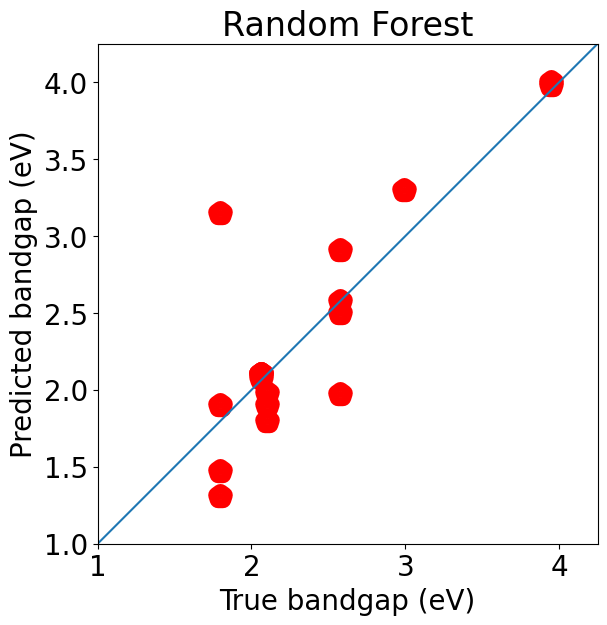

0.4028304171100403
[[1.         0.84779107]
 [0.84779107 1.        ]]
r2= 0.7185439697373411


array([2.99      , 2.57793103, 1.79571429, 2.57793103, 2.57793103,
       2.57793103, 3.95      , 2.06259259, 3.95      , 2.09967742,
       2.09967742, 1.79571429, 2.06259259, 2.06259259, 1.79571429,
       2.06259259, 1.79571429, 2.09967742])

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
ada_reg = AdaBoostRegressor()
ada_reg.fit(X_train,y_train)

AdaBoostRegressor()
y_pred = np.array(ada_reg.predict(X_test))

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(y_pred, y_test,color='r',linewidths=12,marker="p",)
ax.plot([0,1],[0,1], transform=ax.transAxes)
# ax.set_xlabel('True bandgap')
# ax.set_ylabel('Predicted bandgap')
ax.set_title('Random Forest')
plt.rc('font', size=20)
plt.ylim([100,50])
plt.rcParams["figure.figsize"] = (5,5)
plt.xlabel('True bandgap (eV)', fontsize=20)
plt.ylabel('Predicted bandgap (eV)', fontsize=20)
plt.xlim([1,4.25])
plt.ylim([1,4.25])
plt.show()

from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_test, y_pred, squared=False)
print(rms)
r=np.corrcoef(y_test, y_pred)
print(r)
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('r2=',r2)

y_pred

**Gradient boost Regression**

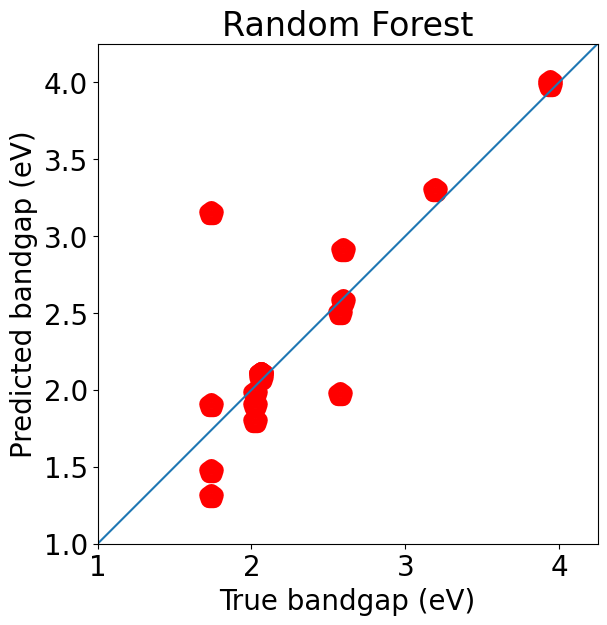

0.39728121629800545
[[1.         0.85349436]
 [0.85349436 1.        ]]
r2= 0.7262449688265735


array([3.19235499, 2.59165743, 1.73494866, 2.59165743, 2.57404223,
       2.57404223, 3.93913573, 2.06166748, 3.93913573, 2.02345036,
       2.02345036, 1.73494866, 2.06166748, 2.06166748, 1.73494866,
       2.06166748, 1.73494866, 2.02345036])

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)
y_pred = gbr_model.predict(X_test)

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(y_pred, y_test,color='r',linewidths=12,marker="p",)
ax.plot([0,1],[0,1], transform=ax.transAxes)
# ax.set_xlabel('True bandgap')
# ax.set_ylabel('Predicted bandgap')
ax.set_title('Random Forest')
plt.rc('font', size=20)
plt.ylim([100,50])
plt.rcParams["figure.figsize"] = (5,5)
plt.xlabel('True bandgap (eV)', fontsize=20)
plt.ylabel('Predicted bandgap (eV)', fontsize=20)
plt.xlim([1,4.25])
plt.ylim([1,4.25])
plt.show()

from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_test, y_pred, squared=False)
print(rms)
r=np.corrcoef(y_test, y_pred)
print(r)
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('r2=',r2)

y_pred

**Decision Tree**

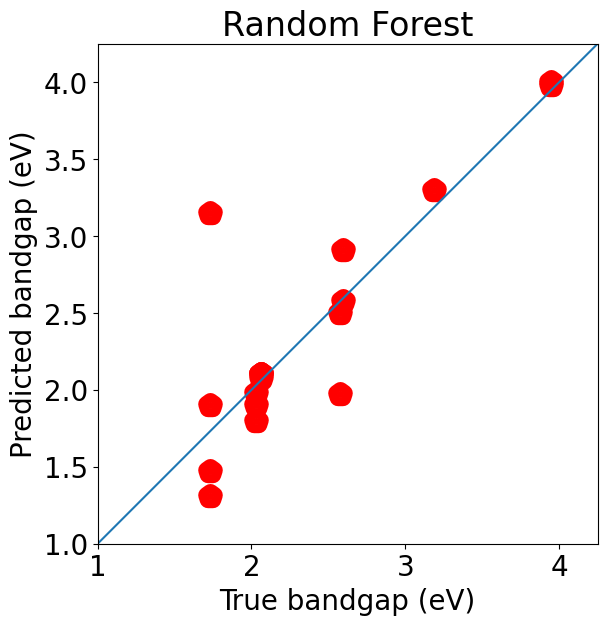

0.3981253972157846
[[1.         0.85305978]
 [0.85305978 1.        ]]
r2= 0.7250803313138999


array([3.18666667, 2.592     , 1.72833333, 2.592     , 2.57285714,
       2.57285714, 3.95      , 2.06      , 3.95      , 2.02625   ,
       2.02625   , 1.72833333, 2.06      , 2.06      , 1.72833333,
       2.06      , 1.72833333, 2.02625   ])

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred =dtr.predict(X_test)

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(y_pred, y_test,color='r',linewidths=12,marker="p",)
ax.plot([0,1],[0,1], transform=ax.transAxes)
# ax.set_xlabel('True bandgap')
# ax.set_ylabel('Predicted bandgap')
ax.set_title('Random Forest')
plt.rc('font', size=20)
plt.ylim([100,50])
plt.rcParams["figure.figsize"] = (5,5)
plt.xlabel('True bandgap (eV)', fontsize=20)
plt.ylabel('Predicted bandgap (eV)', fontsize=20)
plt.xlim([1,4.25])
plt.ylim([1,4.25])
plt.show()

from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_test, y_pred, squared=False)
print(rms)
r=np.corrcoef(y_test, y_pred)
print(r)
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('r2=',r2)

y_pred